In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pickle, itertools

import matplotlib
# rc('text', usetex=True)
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True

BASE_DIR = '/'.join(str.split(os.path.abspath('') , '/')[:-3])
sys.path.append(BASE_DIR)
DATA_DIR = BASE_DIR + '/out'

/home/edwardzhu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [20]:
exp_dir = '/2020-03-15_16-39-46'

it = 20
n_a = 3
dt = 0.1

it_dir = DATA_DIR + exp_dir + ('/it_%i' % (it))

x_cls = pickle.load(open(it_dir + '/x_cls.pkl', 'rb'), encoding='latin1')
u_cls = pickle.load(open(it_dir + '/u_cls.pkl', 'rb'), encoding='latin1')
x_ol = pickle.load(open(it_dir + '/x_ol.pkl', 'rb'), encoding='latin1')
u_ol = pickle.load(open(it_dir + '/u_ol.pkl', 'rb'), encoding='latin1')

n_cls = len(x_cls)

agent_colors = np.array([[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.6350, 0.0780, 0.1840]])

Text(0.5, 1.0, 'Acceleration [m/(s^2)]')

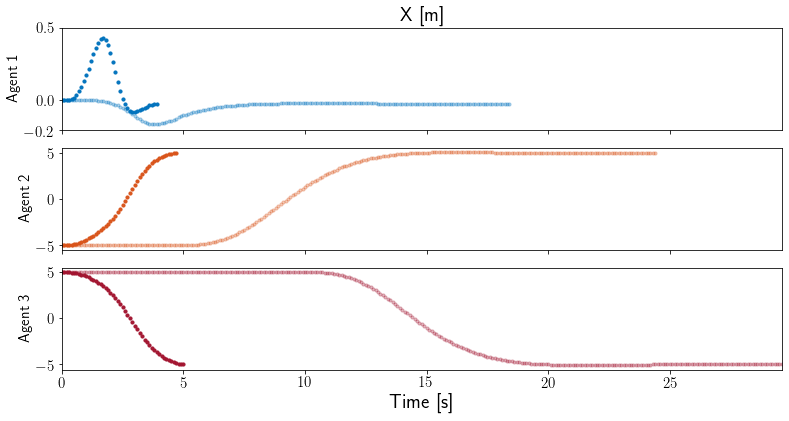

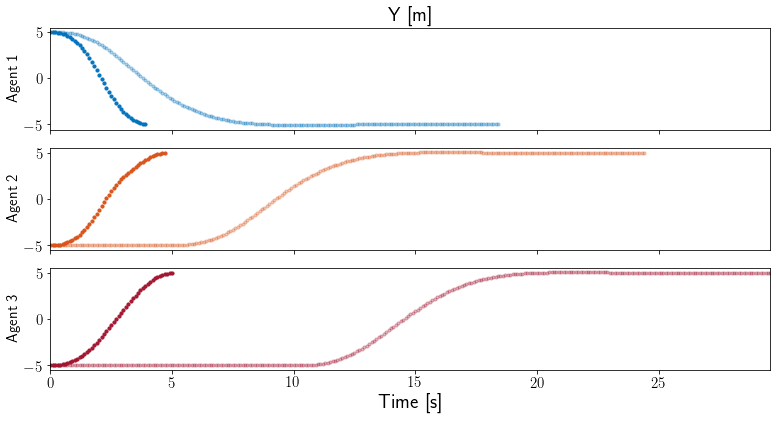

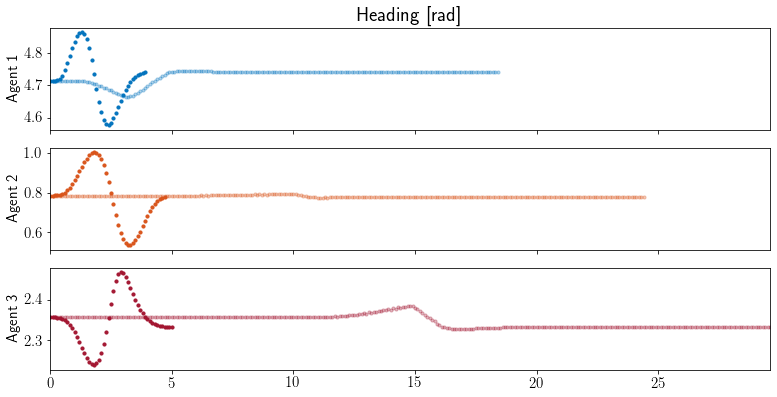

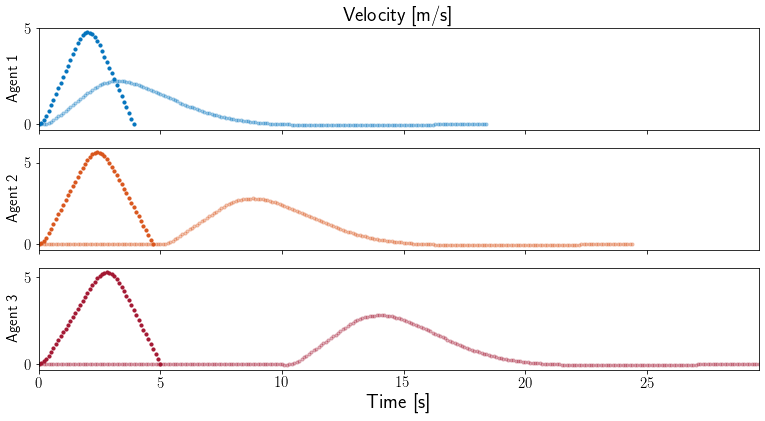

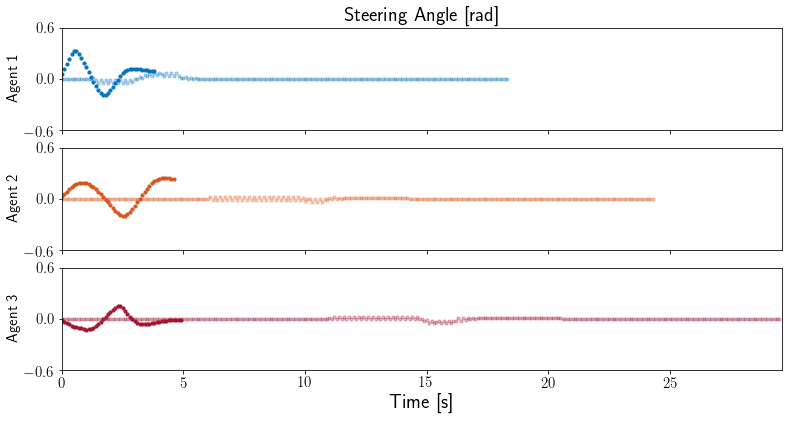

RuntimeError: latex was not able to process the following string:
b'Acceleration [m/(s^2)]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/edwardzhu/.cache/matplotlib/tex.cache/c3993e5209a9b97dadb7398dc0851c8a.t
ex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/type1ec/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c3993e5209a9b97dadb7398dc0851c8a.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...}{25.000000}{\sffamily Acceleration [m/(s^
                                                  2)]}
No pages of output.
Transcript written on c3993e5209a9b97dadb7398dc0851c8a.log.




<Figure size 720x360 with 3 Axes>

In [21]:
# Plot closed loop trajectories
fig_w = 10
fig_h = 5

plot_int = 4

max_t = 0

# plot_cls = range(0, it, plot_int)
# if plot_cls[-1] != it-1:
#     plot_cls.append(it - 1)

plot_cls = [0, it-1]

x_fig = plt.figure(figsize=(fig_w, fig_h))
x_axs = [x_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

y_fig = plt.figure(figsize=(fig_w, fig_h))
y_axs = [y_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

psi_fig = plt.figure(figsize=(fig_w, fig_h))
psi_axs = [psi_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]


vel_fig = plt.figure(figsize=(fig_w, fig_h))
vel_axs = [vel_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

df_fig = plt.figure(figsize=(fig_w, fig_h))
df_axs = [df_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

a_fig = plt.figure(figsize=(fig_w, fig_h))
a_axs = [a_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

# max_t = 5
for i in plot_cls:
    it_x_cl = x_cls[i]
    it_u_cl = u_cls[i]
    for j in range(n_a):
        alpha = 0.3 + 0.7 * (float(i)/(len(x_cls)-1))
        agent_x_cl = it_x_cl[j]
        agent_u_cl = it_u_cl[j]
        t_vec = dt*np.arange(agent_x_cl.shape[1])
        if t_vec[-1] > max_t:
            max_t = t_vec[-1]
        
        x_axs[j].scatter(t_vec, agent_x_cl[0,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        y_axs[j].scatter(t_vec, agent_x_cl[1,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        psi_axs[j].scatter(t_vec, agent_x_cl[2,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        vel_axs[j].scatter(t_vec, agent_x_cl[3,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        df_axs[j].scatter(t_vec[:-1], agent_u_cl[0,:-1], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        a_axs[j].scatter(t_vec[:-1], agent_u_cl[1,:-1], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)

for j in range(n_a):
    x_axs[j].set_xlim([0,max_t])
    x_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    if j == 0:
        x_axs[j].set_yticks([-0.2, 0, 0.5])
    else:
        x_axs[j].set_yticks([-5, 0, 5])
    plt.setp(x_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        x_axs[j].set_xticklabels([])
    
    y_axs[j].set_xlim([0,max_t])
    y_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    y_axs[j].set_yticks([-5, 0, 5])
    plt.setp(y_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        y_axs[j].set_xticklabels([])
    
    psi_axs[j].set_xlim([0,max_t])
    psi_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
#     psi_axs[j].set_yticks([-0.6, 0, 0.6])
    plt.setp(psi_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        psi_axs[j].set_xticklabels([])
        
    vel_axs[j].set_xlim([0,max_t])
    vel_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    vel_axs[j].set_yticks([0, 5])
    plt.setp(vel_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        vel_axs[j].set_xticklabels([])
        
    df_axs[j].set_xlim([0,max_t])
    df_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    df_axs[j].set_yticks([-0.6, 0, 0.6])
    plt.setp(df_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        df_axs[j].set_xticklabels([])
        
    a_axs[j].set_xlim([0,max_t])
    a_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    a_axs[j].set_yticks([-3.1, 0, 3.1])
    plt.setp(a_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        a_axs[j].set_xticklabels([])

plt.setp(x_axs[0].get_xticklabels(), fontsize=20)
x_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(x_axs[-1].get_xticklabels(), fontsize=15)
x_axs[0].set_title('X [m]', fontsize=20)

plt.setp(y_axs[0].get_xticklabels(), fontsize=20)
y_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(y_axs[-1].get_xticklabels(), fontsize=15)
y_axs[0].set_title('Y [m]', fontsize=20)

plt.setp(psi_axs[0].get_xticklabels(), fontsize=20)
y_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(psi_axs[-1].get_xticklabels(), fontsize=15)
psi_axs[0].set_title('Heading [rad]', fontsize=20)

plt.setp(vel_axs[0].get_xticklabels(), fontsize=20)
vel_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(vel_axs[-1].get_xticklabels(), fontsize=15)
vel_axs[0].set_title('Velocity [m/s]', fontsize=20)

plt.setp(df_axs[0].get_xticklabels(), fontsize=20)
df_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(df_axs[-1].get_xticklabels(), fontsize=15)
df_axs[0].set_title('Steering Angle [rad]', fontsize=20)

plt.setp(a_axs[0].get_xticklabels(), fontsize=20)
a_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(a_axs[-1].get_xticklabels(), fontsize=15)
a_axs[0].set_title('Acceleration [m/(s^2)]', fontsize=20)

Text(0.45, -0.15, 'Time [s]')

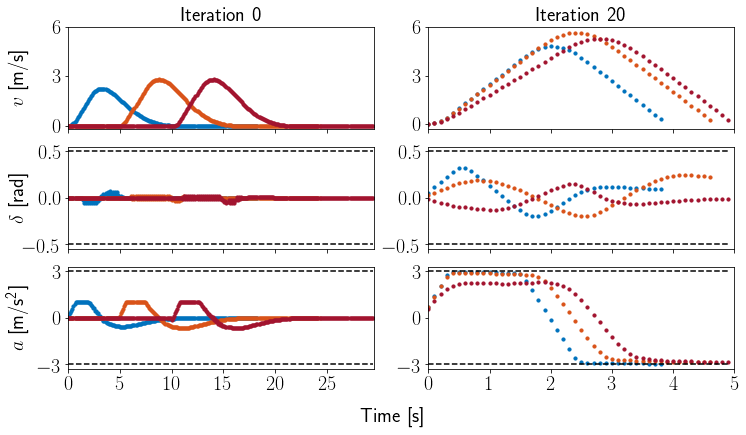

In [22]:
# Plot closed loop trajectories
fig_w = 10
fig_h = 5

plot_int = 4

# plot_cls = range(0, it, plot_int)
# if plot_cls[-1] != it-1:
#     plot_cls.append(it - 1)

plot_cls = [0, it]
n_plot = 3
n_it = len(plot_cls)

fig = plt.figure(figsize=(fig_w, fig_h))
axs = [[] for _ in range(n_it)]
for j in range(n_it):
    for i in range(n_plot):
        axs[j].append(fig.add_axes([j*1.0/n_it,(n_plot-1-i)*1.0/n_plot,1.0/n_it-0.075,1.0/n_plot-0.05]))

for j in range(n_it):
    it_x_cl = x_cls[plot_cls[j]]
    it_u_cl = u_cls[plot_cls[j]]
    max_t = 0
    for a in range(n_a):
        agent_x_cl = it_x_cl[a]
        agent_u_cl = it_u_cl[a]
        t_vec = dt*np.arange(agent_x_cl.shape[1])
        if t_vec[-1] > max_t:
            max_t = t_vec[-1]
        axs[j][0].scatter(t_vec[:-1], agent_x_cl[3,:-1], c=agent_colors[a].reshape((1,-1)), s=10)
        axs[j][1].scatter(t_vec[:-1], agent_u_cl[0,:-1], c=agent_colors[a].reshape((1,-1)), s=10)
        axs[j][2].scatter(t_vec[:-1], agent_u_cl[1,:-1], c=agent_colors[a].reshape((1,-1)), s=10)
    
    axs[j][1].plot(t_vec[:-1], 0.5*np.ones(len(t_vec[:-1])), 'k--')
    axs[j][1].plot(t_vec[:-1], -0.5*np.ones(len(t_vec[:-1])), 'k--')
    axs[j][2].plot(t_vec[:-1], 3*np.ones(len(t_vec[:-1])), 'k--')
    axs[j][2].plot(t_vec[:-1], -3*np.ones(len(t_vec[:-1])), 'k--')
    
    for i in range(n_plot):
        axs[j][i].set_xlim([0,max_t])
        if i < n_plot-1:
            axs[j][i].set_xticklabels([])
        plt.setp(axs[j][i].get_yticklabels(), fontsize=20)
    
    axs[j][0].set_yticks([0, 3, 6])
    axs[j][1].set_yticks([-0.5, 0, 0.5])
    axs[j][2].set_yticks([-3, 0, 3])
    if j == 0:
        axs[j][0].set_ylabel(r'$v$ [m/s]', fontsize=20)
        axs[j][1].set_ylabel(r'$\delta$ [rad]', fontsize=20)
        axs[j][2].set_ylabel(r'$a$ [m/s\textsuperscript{2}]', fontsize=20)
        axs[j][0].get_yaxis().set_label_coords(-0.13,0.5)
        axs[j][1].get_yaxis().set_label_coords(-0.13,0.5)
        axs[j][2].get_yaxis().set_label_coords(-0.13,0.5)
    
    plt.setp(axs[j][-1].get_xticklabels(), fontsize=20)
    
    axs[j][0].set_title('Iteration %i' % (plot_cls[j]), fontsize=20)    
    
fig.text(0.45, -0.15, 'Time [s]', ha='center', fontsize=20)

[None, None, None, None, None, None]

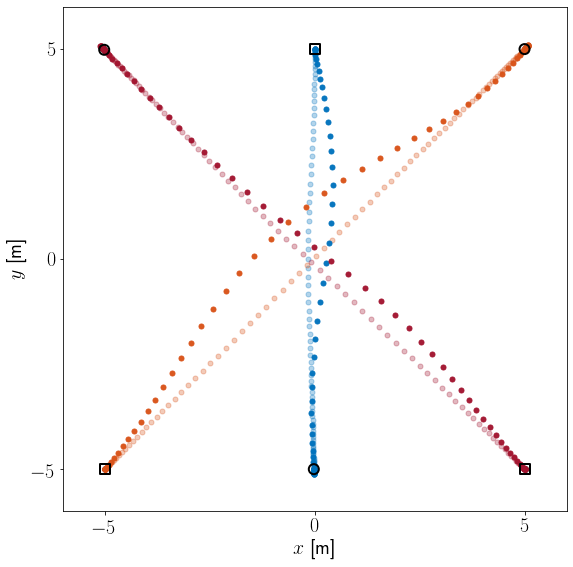

In [23]:
x_lim = [-6, 6]
y_lim = [-6, 6]
pos_fig_w = 7
pos_fig_h = 7

all_pos_fig = plt.figure(figsize=(pos_fig_w, pos_fig_h))
all_pos_ax = all_pos_fig.add_axes([1,1,1,1])

plot_cls = [0, it-1]

for i in plot_cls:
    it_x_cl = x_cls[i]
    it_u_cl = u_cls[i]
    for j in range(n_a):
        alpha = 0.3 + 0.7 * (float(i)/(len(x_cls)-1))
        agent_x_cl = it_x_cl[j]
        agent_u_cl = it_u_cl[j]
        
        all_pos_ax.scatter(agent_x_cl[0,:], agent_x_cl[1,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=25)
        
for j in range(n_a):  
    all_pos_ax.scatter(x_cls[0][j][0,0], x_cls[0][j][1,0], marker='s', s=100, facecolors='none', edgecolors='k', linewidth=2)
    all_pos_ax.scatter(x_cls[0][j][0,-1], x_cls[0][j][1,-1], marker='o', s=100, facecolors='none', edgecolors='k', linewidth=2)

all_pos_ax.set_xlabel('$x$ [m]', fontsize=20)
all_pos_ax.set_ylabel('$y$ [m]', fontsize=20)
all_pos_ax.set_xlim(x_lim)
all_pos_ax.set_ylim(y_lim)
all_pos_ax.set_aspect('equal')
all_pos_ax.set_xticks([-5, 0, 5])
all_pos_ax.set_yticks([-5, 0, 5])
plt.setp(all_pos_ax.get_xticklabels(), fontsize=20)
plt.setp(all_pos_ax.get_yticklabels(), fontsize=20)

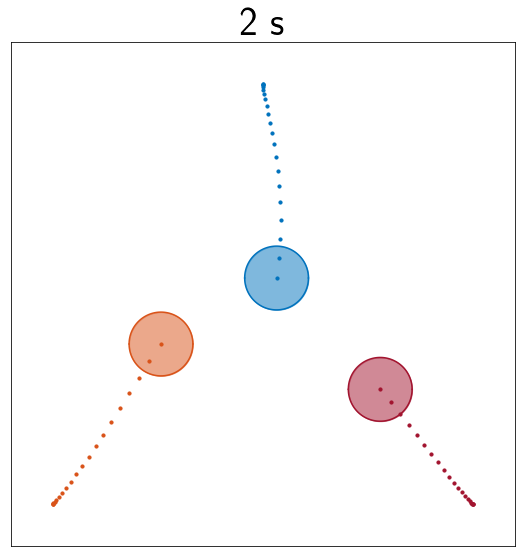

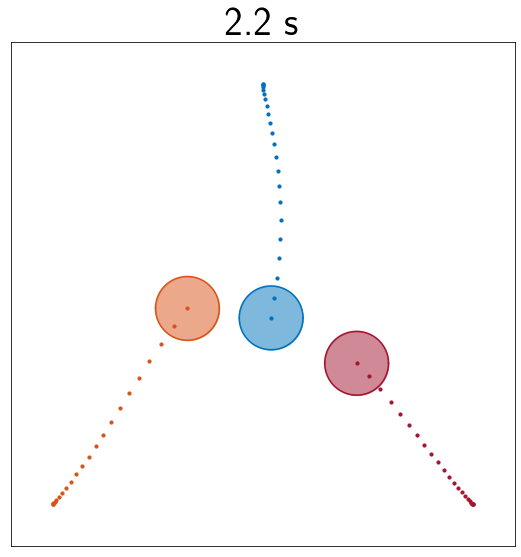

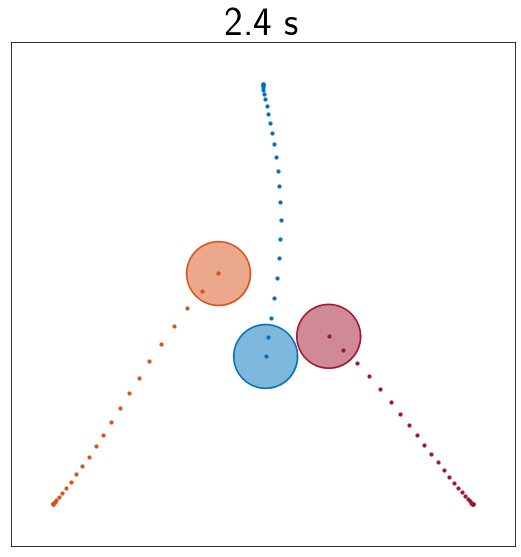

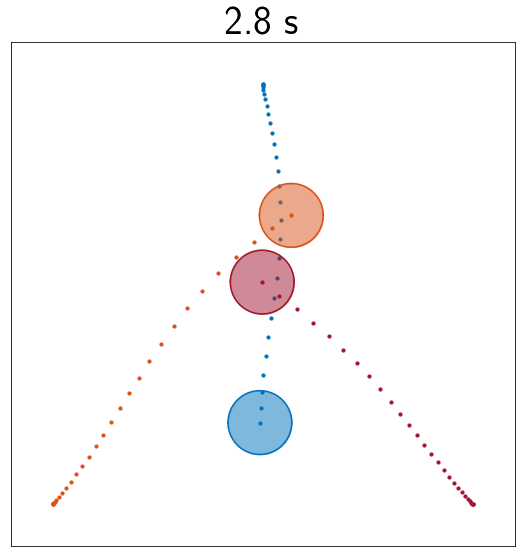

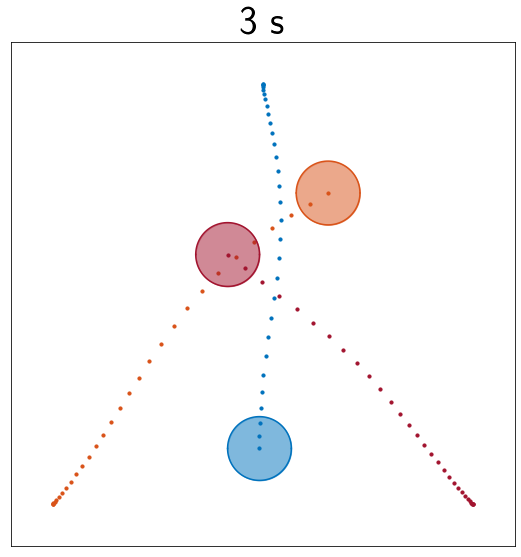

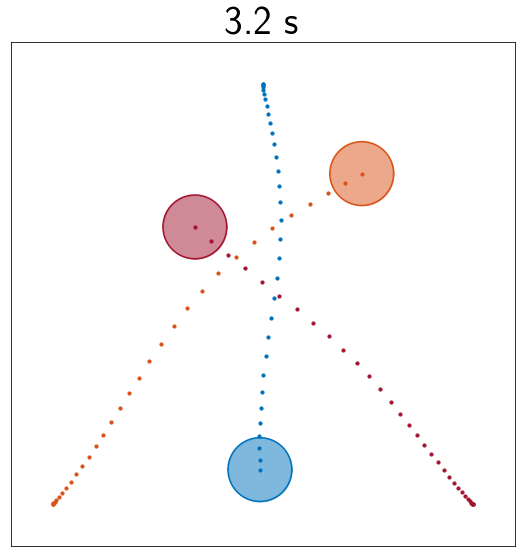

In [24]:
snapshot_ts = [20, 22, 24, 28, 30, 32]
snapshot_pos_figs = [plt.figure(figsize=(pos_fig_w, pos_fig_h)) for _ in range(len(snapshot_ts))]
snapshot_pos_ax = [f.add_axes([1,1,1,1]) for f in snapshot_pos_figs]

last_x_cl = x_cls[-1]
last_u_cl = u_cls[-1]
r = 0.759
for (i, t) in enumerate(snapshot_ts):
    for j in range(n_a):
        top_ang = np.linspace(0, np.pi, 100)
        bottom_ang = np.linspace(0, -np.pi, 100)
        x = r*np.cos(top_ang) + last_x_cl[j][0,t]
        top_y = r*np.sin(top_ang) + last_x_cl[j][1,t]
        bottom_y = r*np.sin(bottom_ang) + last_x_cl[j][1,t]
        snapshot_pos_ax[i].plot(x, top_y, color=agent_colors[j])
        snapshot_pos_ax[i].plot(x, bottom_y, color=agent_colors[j])
        snapshot_pos_ax[i].fill_between(x, top_y, bottom_y, color=agent_colors[j], alpha=0.5)
        snapshot_pos_ax[i].scatter(last_x_cl[j][0,:t+1], last_x_cl[j][1,:t+1], c=agent_colors[j].reshape((1,-1)), s=10)
    snapshot_pos_ax[i].set_xlim(x_lim)
    snapshot_pos_ax[i].set_ylim(y_lim)
    snapshot_pos_ax[i].set_aspect('equal')
    snapshot_pos_ax[i].set_xticks([])
    snapshot_pos_ax[i].set_yticks([])
    snapshot_pos_ax[i].set_title('%g s' % (t*dt), fontsize=40)
#     snapshot_pos_ax[i].set_xticks([-5, 0, 5])
#     snapshot_pos_ax[i].set_yticks([-5, 0, 5])
#     plt.setp(snapshot_pos_ax[i].get_xticklabels(), fontsize=20)
#     plt.setp(snapshot_pos_ax[i].get_yticklabels(), fontsize=20)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

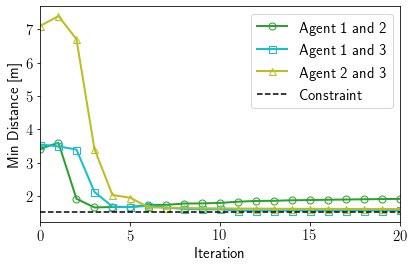

In [30]:
from numpy import linalg as la

fig_w = 5
fig_h = 3
dist_fig = plt.figure(figsize=(fig_w, fig_h))
dist_ax = dist_fig.add_axes([1,1,1,1])

pairs = list(itertools.combinations(range(n_a), 2))
r = 0.759

min_dists = [[] for _ in range(len(pairs))]
for i in range(n_cls):
    it_x_cl = x_cls[i]
    it_u_cl = u_cls[i]
    for (j,p) in enumerate(pairs):
        agent_x_cl_0 = it_x_cl[p[0]]
        agent_x_cl_1 = it_x_cl[p[1]]
        
        if agent_x_cl_0.shape[1] < agent_x_cl_1.shape[1]:
            agent_x_cl_0 = np.append(agent_x_cl_0, np.tile(agent_x_cl_0[:,-1].reshape((-1,1)), (1,agent_x_cl_1.shape[1]-agent_x_cl_0.shape[1])), axis=1)
        elif agent_x_cl_0.shape[1] > agent_x_cl_1.shape[1]:
            agent_x_cl_1 = np.append(agent_x_cl_1, np.tile(agent_x_cl_1[:,-1].reshape((-1,1)), (1,agent_x_cl_0.shape[1]-agent_x_cl_1.shape[1])), axis=1)
            
        dist = la.norm(agent_x_cl_1[:2] - agent_x_cl_0[:2], axis=0, ord=2)
        
        min_dists[j].append(np.amin(dist))

dist_ax.plot(range(n_cls), min_dists[0], '-o', color='tab:green', linewidth=2, markersize=7, fillstyle='none', label=('Agent %i and %i' % (pairs[0][0]+1, pairs[0][1]+1)))
dist_ax.plot(range(n_cls), min_dists[1], '-s', color='tab:cyan', linewidth=2, markersize=7, fillstyle='none', label=('Agent %i and %i' % (pairs[1][0]+1, pairs[1][1]+1)))
dist_ax.plot(range(n_cls), min_dists[2], '-^', color='tab:olive', linewidth=2, markersize=7, fillstyle='none', label=('Agent %i and %i' % (pairs[2][0]+1, pairs[2][1]+1)))

dist_ax.plot(range(n_cls), 2*r*np.ones(n_cls), 'k--', label='Constraint')
dist_ax.set_xlabel('Iteration', fontsize=15)
dist_ax.set_ylabel('Min Distance [m]', fontsize=15)
dist_ax.legend(fontsize=15)
dist_ax.set_xticks([0, 5, 10, 15, 20])
# dist_ax.set_yticks([-5, 0, 5])
dist_ax.set_xlim([0,it])
# dist_ax.set_ylim(y_lim)
plt.setp(dist_ax.get_xticklabels(), fontsize=15)
plt.setp(dist_ax.get_yticklabels(), fontsize=15)

In [16]:
decen_exp_dir = '/2020-03-15_16-39-46'
cen_exp_dir = '/2020-03-13_09-57-14'

n_a = 3
dt = 0.1

decen_it = 100
decen_it_dir = DATA_DIR + decen_exp_dir + ('/it_%i' % (decen_it))

decen_x_cls = pickle.load(open(decen_it_dir + '/x_cls.pkl', 'rb'), encoding='latin1')
decen_u_cls = pickle.load(open(decen_it_dir + '/u_cls.pkl', 'rb'), encoding='latin1')
decen_x_ol = pickle.load(open(decen_it_dir + '/x_ol.pkl', 'rb'), encoding='latin1')
decen_u_ol = pickle.load(open(decen_it_dir + '/u_ol.pkl', 'rb'), encoding='latin1')
decen_agent_times = pickle.load(open(decen_it_dir + '/agent_times.pkl', 'rb'), encoding='latin1')
decen_it_times = pickle.load(open(decen_it_dir + '/it_times.pkl', 'rb'), encoding='latin1')
decen_agent_solve_times = pickle.load(open(decen_it_dir + '/agent_solve_times.pkl', 'rb'), encoding='latin1')

decen_n_cls = len(decen_x_cls)

cen_it = 100
cen_it_dir = DATA_DIR + cen_exp_dir + ('/it_%i' % (cen_it))

cen_x_cls = pickle.load(open(cen_it_dir + '/x_cls.pkl', 'rb'), encoding='latin1')
cen_u_cls = pickle.load(open(cen_it_dir + '/u_cls.pkl', 'rb'), encoding='latin1')
cen_x_ol = pickle.load(open(cen_it_dir + '/x_ol.pkl', 'rb'), encoding='latin1')
cen_u_ol = pickle.load(open(cen_it_dir + '/u_ol.pkl', 'rb'), encoding='latin1')
cen_it_times = pickle.load(open(cen_it_dir + '/it_times.pkl', 'rb'), encoding='latin1')
cen_solve_times = pickle.load(open(cen_it_dir + '/solve_times.pkl', 'rb'), encoding='latin1')

cen_n_cls = len(cen_x_cls)

In [18]:
# print(decen_agent_solve_times)
# print(decen_agent_times)
# print(cen_it_times)
# print(len(cen_solve_times))
# print(len(decen_agent_times))

for i in range(len(decen_agent_times)):
    max_agent_time = np.amax(decen_agent_times[i])
    cen_time = np.sum(cen_solve_times[i])
    
    print('Iteration %i speedup: %g' % (i, cen_time/max_agent_time))

Iteration 0 speedup: 7.71429
Iteration 1 speedup: 26.9393
Iteration 2 speedup: 30.0166
Iteration 3 speedup: 20.0653
Iteration 4 speedup: 18.2546
Iteration 5 speedup: 19.1332
Iteration 6 speedup: 18.8828
Iteration 7 speedup: 18.4428
Iteration 8 speedup: 17.7949
Iteration 9 speedup: 16.5092
Iteration 10 speedup: 15.7622
Iteration 11 speedup: 14.7652
Iteration 12 speedup: 15.0751
Iteration 13 speedup: 13.9827
Iteration 14 speedup: 12.4392
Iteration 15 speedup: 12.9631
Iteration 16 speedup: 12.5575
Iteration 17 speedup: 11.7549
Iteration 18 speedup: 11.2022
Iteration 19 speedup: 10.7837
Iteration 20 speedup: 9.82875
Iteration 21 speedup: 9.97236
Iteration 22 speedup: 9.61404
Iteration 23 speedup: 9.06224
Iteration 24 speedup: 8.80004
Iteration 25 speedup: 8.74657
Iteration 26 speedup: 8.78452
Iteration 27 speedup: 8.47535
Iteration 28 speedup: 8.37186
Iteration 29 speedup: 8.61877
Iteration 30 speedup: 8.07117
Iteration 31 speedup: 7.93905
Iteration 32 speedup: 7.64049
Iteration 33 speedup